In [1]:
from utils import *

# Functions

# $f(x) = An + \sum^n_{i=1}[x^2_i - A\cos(2\pi x_i)]$ (Rastrigin function)

## Dataset

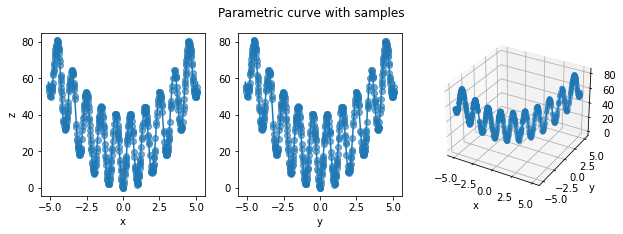

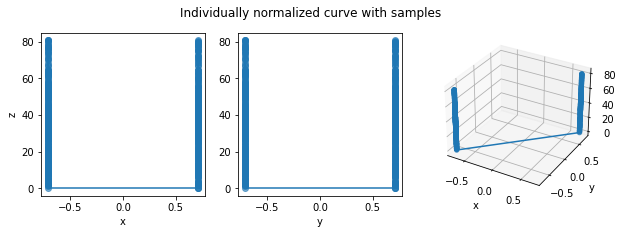

In [2]:
x = np.linspace(-5.12, 5.12, 1000)
y = x
z = 10 * 2 + (x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y))
datasets = processing(x,y,z)
X, y = datasets['orig']
X_norm, y_norm = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_train_norm, y_train_norm, y_train_norm_noisy = datasets['norm train']

_ = plot(
    (X, X_train), 
    (z.ravel(), y_train_noisy), 
    typ='data', 
    title="Parametric curve with samples"
)
_ = plot(
    (X_norm, X_train_norm), 
    (y_norm.ravel(), y_train_norm_noisy), 
    typ='data', 
    title="Individually normalized curve with samples"
)

## Noiseless

### $\mathbb{R}^d$

NTK     :  4.4**2 * NTK(depth=2, c=2.000, bias=1.955)
Laplace :  52.7**2 * Matern(length_scale=49.5, nu=0.5)


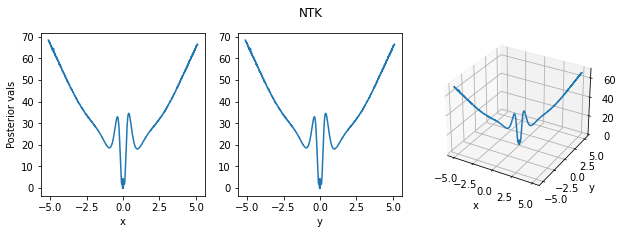

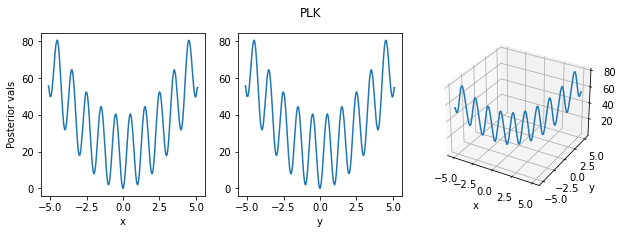

In [3]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=0.05, 
        constant_value_bounds=(1e-9, 1e5) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_ = plot(X, mean_ntk.ravel(), 'kernel', 'NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_ = plot(X, mean_lpk.ravel(), 'kernel', 'PLK')

### $\mathbb{S}^{d-1}$

NTK     :  4.6**2 * NTK(depth=2, c=2.000, bias=0.000)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit 

Laplace :  316**2 * Matern(length_scale=0.1, nu=0.5)


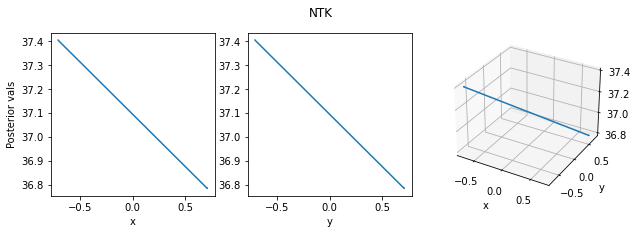

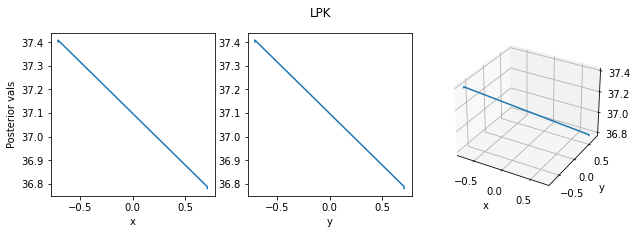

In [4]:
gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, y_train_norm)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, y_train_norm)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Noisy

### $\mathbb{R}^d$

NTK     :  257**2 * NTK(depth=2, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.15)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Laplace :  31.6**2 * Matern(length_scale=16, nu=0.5) + WhiteKernel(noise_level=0.15)


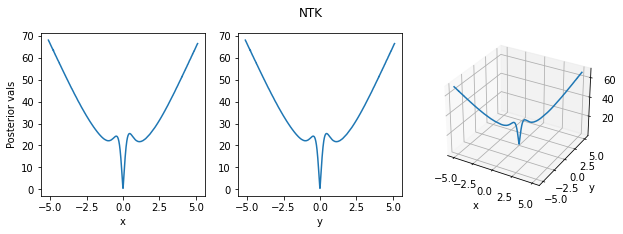

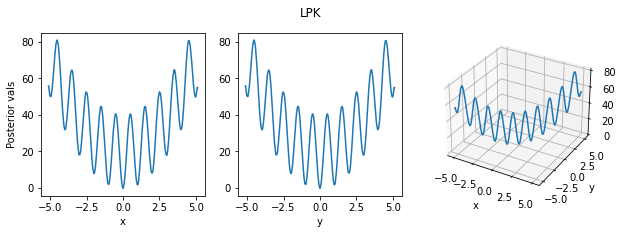

In [5]:
ntk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds=(1e-9, 1e2)
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)
# alpha deals with std 
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

### $\mathbb{S}^{d-1}$

NTK     :  138**2 * NTK(depth=2, c=2.000, bias=0.320) + WhiteKernel(noise_level=0.15)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Laplace :  31.6**2 * Matern(length_scale=15.9, nu=0.5) + WhiteKernel(noise_level=0.15)


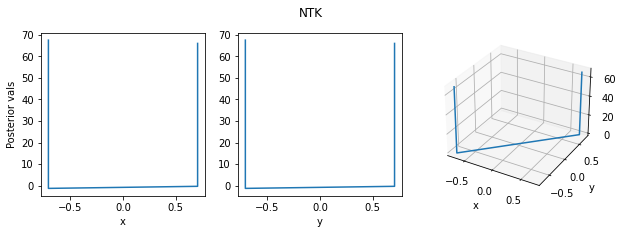

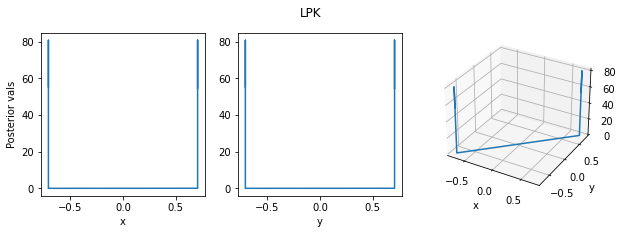

In [6]:
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_norm_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_norm_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

# $f(x,y) = -\cos(x)\cos(y)\exp\left(-\left((x-\pi)^2 + (y-\pi)^2\right)\right)$ (Easom function)

## Dataset

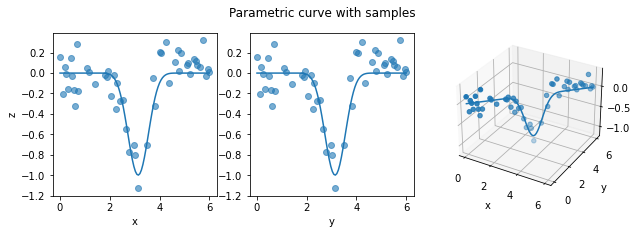

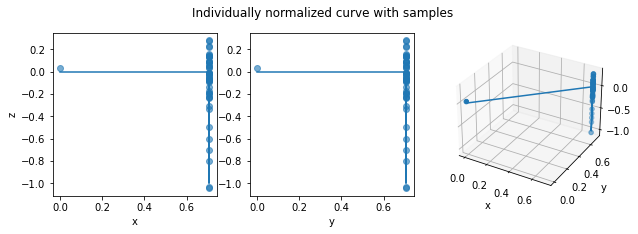

In [7]:
x = np.linspace(0, 6, 100)
y = x
z = -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2 + (y-np.pi)**2))
datasets = processing(x,y,z)
X, y = datasets['orig']
X_norm, y_norm = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_train_norm, y_train_norm, y_train_norm_noisy = datasets['norm train']

_ = plot(
    (X, X_train), 
    (z.ravel(), y_train_noisy), 
    typ='data', 
    title="Parametric curve with samples"
)
_ = plot(
    (X_norm, X_train_norm), 
    (y_norm.ravel(), y_train_norm_noisy), 
    typ='data', 
    title="Individually normalized curve with samples"
)

## Noiseless

### $\mathbb{R}^d$

NTK     :  5.06**2 * NTK(depth=2, c=2.000, bias=0.000)
Laplace :  0.273**2 * Matern(length_scale=4.76, nu=0.5)


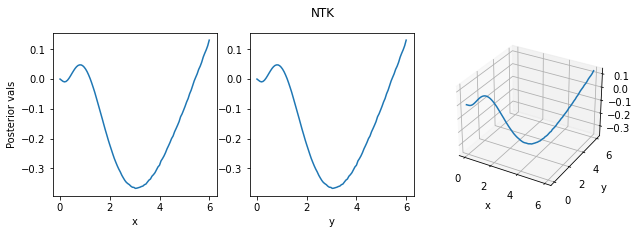

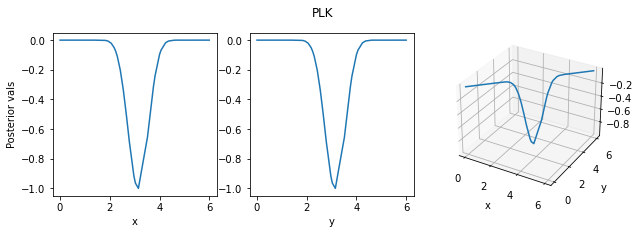

In [8]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=0.05, 
        constant_value_bounds=(1e-9, 1e5) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_ = plot(X, mean_ntk.ravel(), 'kernel', 'NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_ = plot(X, mean_lpk.ravel(), 'kernel', 'PLK')

### $\mathbb{S}^{d-1}$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK     :  0.0739**2 * NTK(depth=2, c=2.000, bias=0.000)
Laplace :  0.0906**2 * Matern(length_scale=0.239, nu=0.5)


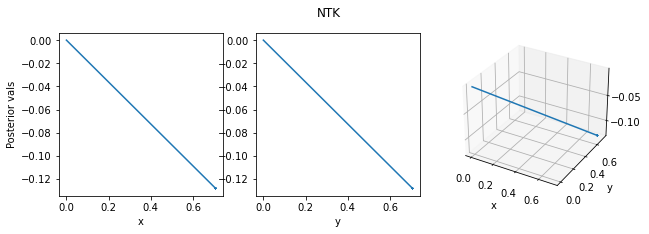

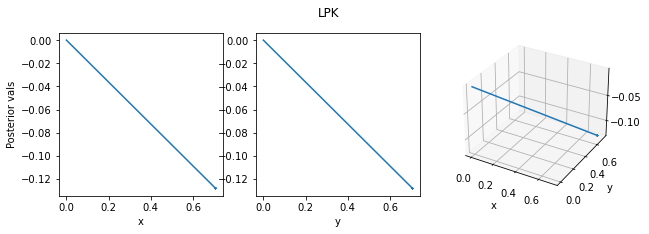

In [9]:
gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, y_train_norm)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, y_train_norm)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Noisy

### $\mathbb{R}^d$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__bias is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NTK     :  3.16e-05**2 * NTK(depth=2, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.15)
Laplace :  0.217**2 * Matern(length_scale=1.75, nu=0.5) + WhiteKernel(noise_level=0.15)


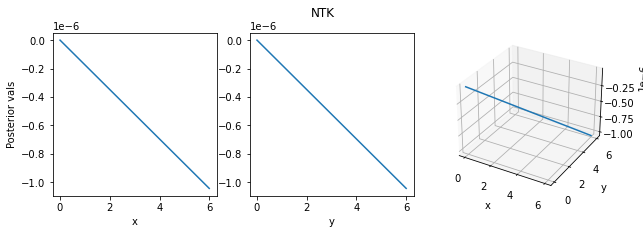

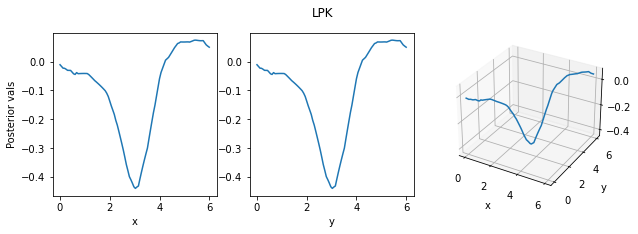

In [10]:
ntk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds=(1e-9, 1e2)
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    + WhiteKernel(
        noise_level=0.15, 
        noise_level_bounds='fixed'#(1e-9, 1e5)
    )
)
# alpha deals with std 
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

### $\mathbb{S}^{d-1}$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK     :  0.00536**2 * NTK(depth=2, c=2.000, bias=7.567) + WhiteKernel(noise_level=0.15)
Laplace :  0.211**2 * Matern(length_scale=1.88, nu=0.5) + WhiteKernel(noise_level=0.15)


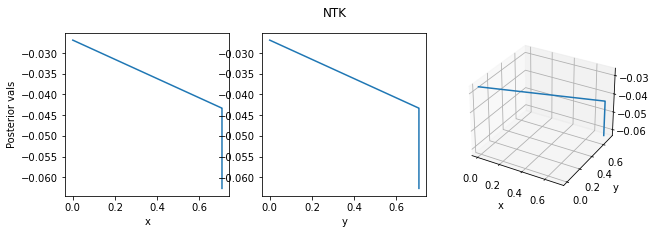

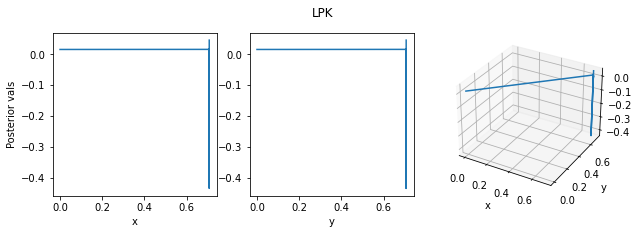

In [11]:
gp_ntk = GPR(kernel=ntk, alpha=0, n_restarts_optimizer=9)
gp_ntk.fit(X_train, y_train_norm_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0, n_restarts_optimizer=9)
gp_lpk.fit(X_train, y_train_norm_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')